## Introduction

Hi! Our group is made up of the three of us, **Alexis, Tom, and Panos** and we're excited to share our project with you. 

Initially, we just started searching around the WPRDC for datasets that were relatively interesting and also had a neighborhood column, or something similar. We threw around some datasets like overdoses and obesity rates, among other things. After finding some datasets on firearm seizures and crime, we decided that safety was going to be the theme for our project.

## The Metric

We're using three different datasets (one for each of us.) Alexis's dataset is [Firearm Seizures](https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4), Panos's dataset is [Police Arrest Data](https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f), and Tom's dataset is on  [Non-Traffic Citations](https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4)

By manipulating our respective datasets, we plan to sort the neighborhoods from least amount of incidents to most incidents. Our metric is safety, therefore the neighborhood with the least incidents is the safest and, according to our metric, the best. 

## The Best Neighborhood 

First, we have results and some visuals from our individual data sets. You might notice some data frames labeled df_norm. Those are for our final merged result, so we'll get to that later.

In [2]:
# let's import all the important stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Alexis's Findings: Firearm seizures

In [3]:
# imports csv and drops incidents without neighborhoods
firearm = pd.read_csv("firearm-seizures-data.csv")
firearm.dropna(subset = ["neighborhood"], inplace=True)

# for normalizing data
firearm_norm = firearm.rename(columns={'neighborhood': 'hood'})

# sums total_count by neighborhood
firearm_norm['total_count'] = pd.to_numeric(firearm_norm['total_count'])
firearm_norm = firearm_norm.groupby('hood')['total_count'].sum()
fire_final = pd.DataFrame(firearm_norm)

# sorting
pd.set_option('display.max_rows', None)
fire_final = fire_final.sort_values(['total_count', 'hood'], ascending=[1, 0])
#fire_final.head(10)

#### Visuals

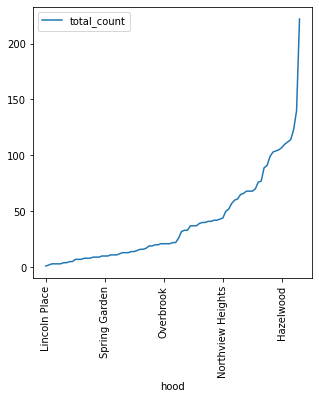

In [4]:
# line graph
fire_final.plot(rot=90, figsize=(5,5))

In [5]:
# better chart view
firearm = firearm.drop(columns=['tract','police_zone','fire_zone','latitude','longitude','ward',
                            'council_district','address','public_works_division'])
firearm.head(5)

,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood
1,1,0,1,0,0,0,2017,4,6,Bluff
2,1,0,1,0,0,0,2015,8,1,Bluff
3,1,0,0,1,0,0,2015,11,5,Homewood West
4,1,0,1,0,0,0,2016,9,0,Manchester
5,1,0,1,0,0,0,2016,9,6,Brookline


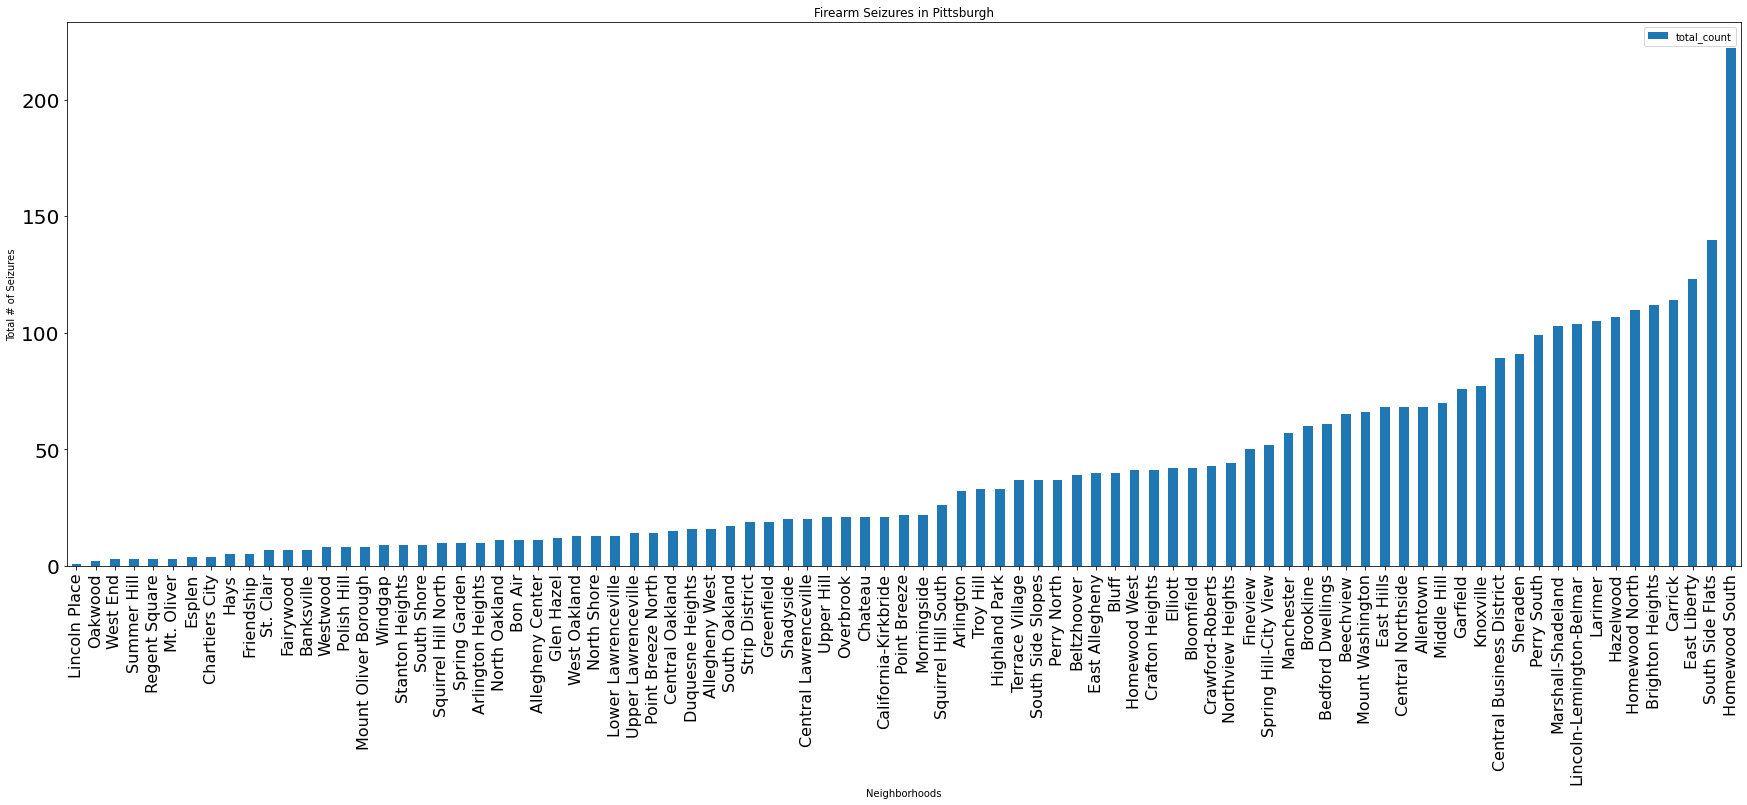

In [6]:
# bar chart
fire_final.plot(kind='bar', stacked=True, figsize=(30,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=20)
plt.title("Firearm Seizures in Pittsburgh")
plt.xlabel("Neighborhoods")
plt.ylabel("Total # of Seizures")
plt.style.use('seaborn-white')

### Tom's Findings: Non-Traffic Citations

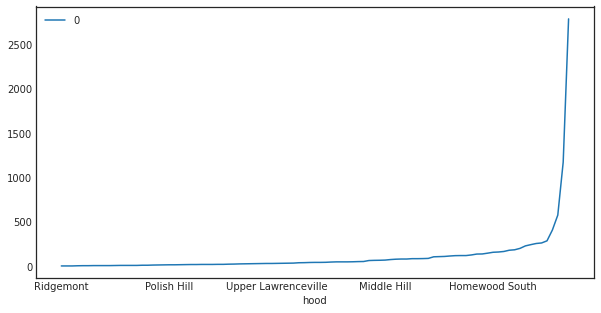

In [40]:
import pandas as pd

%matplotlib inline

citations = pd.read_csv("non-traffic-citations.csv")

citations.dropna(subset = ['NEIGHBORHOOD'], inplace = True)

# for normalizing data
citations_norm = citations.rename(columns={'NEIGHBORHOOD': 'hood'})

#citations_sum = citations_norm.groupby('hood').size().sort_values(ascending = True)
citations_norm = citations_norm.groupby('hood').size().to_frame('citations_count')
#print(citations_norm) 

citations_sum = pd.DataFrame(citations_sum)

#print(citations_sum)

citations_sum.plot(figsize=(10,5))

### Panos's Findings: Police Arrests

hood
Mt. Oliver Neighborhood           2
Troy Hill-Herrs Island            6
Mt. Oliver Boro                  16
Regent Square                    22
Central Northside                23
Ridgemont                        24
New Homestead                    26
Swisshelm Park                   27
Chartiers City                   28
St. Clair                        35
East Carnegie                    36
Outside County                   41
Outside State                    45
Oakwood                          54
Summer Hill                      58
Fairywood                        74
Hays                             75
Windgap                          76
Golden Triangle/Civic Arena      83
Allegheny West                   85
Glen Hazel                       90
Mount Oliver                     96
Arlington Heights               109
Polish Hill                     114
Esplen                          121
Friendship                      122
Lincoln Place                   124
Duquesne Heights       

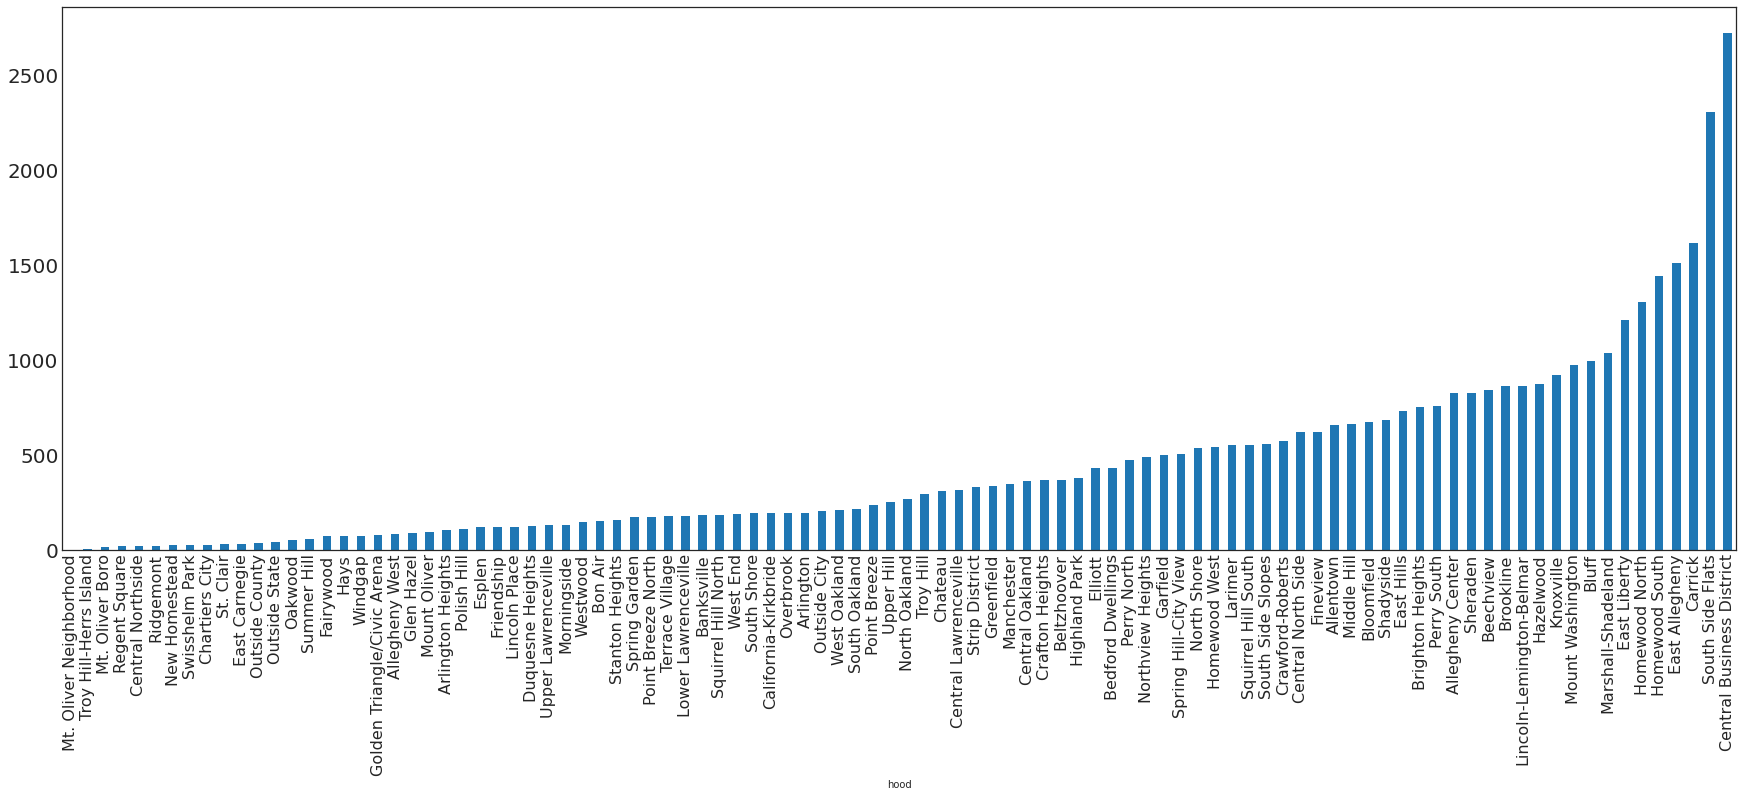

In [13]:
arrests = pd.read_csv("pittsburgh-police-arrest-data.csv")

arrests.dropna(subset = ["INCIDENTNEIGHBORHOOD"], inplace=True)
#pd.set_option("display.max_rows", None)

# for normalizing data
arrests_norm = arrests.rename(columns={'INCIDENTNEIGHBORHOOD': 'hood'})

arrests_sum = arrests_norm.groupby('hood').size().sort_values(ascending=True)
print(arrests_sum)

arrests_sum.plot(kind='bar', stacked=True, figsize=(30,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=20)
plt.style.use('seaborn-white')

In [28]:
# normalization for merged dataframe 1
arrest_norm = arrests_norm.groupby('hood').size().to_frame('arrests_count')
#arrest_norm.head(10)

# normalization for merged dataframe 2
#citations_norm.head(10)

# normalization for merged dataframe 3
firearm_norm = pd.DataFrame(firearm_norm)

### Group Findings

In [41]:
citations_norm.head(5)

,citations_count
hood,
Allegheny Center,125
Allegheny West,15
Allentown,113
Arlington,47
Arlington Heights,6


In [34]:
merged = firearm_norm.merge(citations_norm,on='hood').merge(arrest_norm,on='hood')

merged.head(5)

,total_count,citations_count,arrests_count
hood,,,
Allegheny Center,11,1,828
Allegheny West,16,1,85
Allentown,68,1,659
Arlington,32,1,198
Arlington Heights,10,1,109


In [35]:
merged['total'] = merged.loc[:,['total_count','arrests_count','citations_count']].sum(axis=1)
merged.head(30)

,total_count,citations_count,arrests_count,total
hood,,,,
Allegheny Center,11,1,828,12
Allegheny West,16,1,85,17
Allentown,68,1,659,69
Arlington,32,1,198,33
Arlington Heights,10,1,109,11
Banksville,7,1,184,8
Bedford Dwellings,61,1,436,62
Beechview,65,1,843,66
Beltzhoover,39,1,369,40


### Group Findings

We're working on a sort of grading system so that every neighborhood would recieve a grade based on their number of incidents. This would provide a comprehensive ranking of all the neighborhoods, which will be really great. We have some work attatched below. 

For right now, here are each of our individual top ten lowest incidents.

**Firearm seizures:** 
1. Lincoln Place
2. Oakwood 
3. West End, Summer Hill, Regent Square, and Mt. Oliver Neighborhood (tied)
4. Esplen and Chartiers City (tied)
5. Hays and Friendship (tied)    

**Police arrests**:
1. Mt. Oliver Neighborhood           
2. Troy Hill-Herrs Island            
3. Mt. Oliver Boro                 
4. Regent Square                   
5. Central Northside               
6. Ridgemont                       
7. New Homestead                   
8. Swisshelm Park                  
9. Chartiers City                  
10. St. Clair 

**Non-traffic citations:**
1. Ridgemont, Outside State, Mt. Oliver Boro (tied)
2. St. Clair
3. Swisshelm Park and Mt. Oliver Neighborhood (tied)
4. Summer Hill, Hays, Oakwood, and New Homstead (tied)

The only neighborhood that actually appears on all three lists is Mt. Oliver Neighborhood, and it is also #1 for the least ammount of police arrests. So, without the ranking system, we predict that Mt. Oliver Neighborhood will be the best neighborhood.

As a side note, South Side Flats is rounding out the bottom two spots for all three of our lists. Perhaps it will recieve the worst grade, as the least safe neighborhood

## Conclusion

In [16]:
# normalization for every dataset (rename columns to merge, set size to dataframe)

# arrests 
arrests.rename(columns={'INCIDENTNEIGHBORHOOD': 'hood'}, inplace=True)
arrest_norm = arrests.groupby('hood').size().to_frame('total_count')
arrest_norm = pd.DataFrame(arrests_sum)
arrest_norm.head(10)

,size
hood,
Allegheny Center,828
Allegheny West,85
Allentown,659
Arlington,198
Arlington Heights,109
Banksville,184
Bedford Dwellings,436
Beechview,843
Beltzhoover,369


In [14]:
# firearm seizures
firearm_norm = firearm.rename(columns={'neighborhood': 'hood'})
firearm_norm.head(5)

,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,hood
1,1,0,1,0,0,0,2017,4,6,Bluff
2,1,0,1,0,0,0,2015,8,1,Bluff
3,1,0,0,1,0,0,2015,11,5,Homewood West
4,1,0,1,0,0,0,2016,9,0,Manchester
5,1,0,1,0,0,0,2016,9,6,Brookline


**Alexis:** My favorite neighborhood in Pittsburgh that's not Oakland, is probably downtown, or as it appears in our dataset "Central Business District." It is VERY different from what we have determined or will determine to be the best neighborhood, as it has some of the highest number of incidents in our datasets. However, what makes downtown one of my favorite neighborhoods is all the nostalgia it brings. I grew up entering gingerbread houses in the Winter Garden, skating around tree, and walking around market district (if you're not from pgh this might be a little confusing). Our preliminary best neighborhood is based on safety, not on fun or nostalgia, so I'm using a different metric for my personal favorite, which is okay! 

**Panos:** My favorite neighborhood that is not Oakland is the South Side Flats. I am not originally from Pittsburgh so I am not familiar with many of the neighberhoods around here. However, when I visited South Side I enjoyed all the small stores and the liveliness. According to my arrests data however, the South Side Flats is the neighberhood with the second highests arrest counts. So perhaps it is best to visit this neighberhood instead of living there.

**Tom:** My favorite neighborhood in Pittsburgh has been Mt. Washington.  I am also not from Pittsburgh so when I first visited the city and saw the view from the top of Mt. Washington it was incredible.  Mt. Washington is ranked in the middle for all of our data sets.  Since Mt. Washington has a higher population then many of the other towns that where ranked in the top five, which we still need to consider how incorporating population size would effect our data.